# Exploratory Data Analysis

> EDA can never be the whole story, but nothing else can serve as the foundation stone.

> \- John Tukey. 

Graphical EDA presents the information in a way that is easily interpretable. It guides the actions to take for hypothesis testing:
+ The greatest value of a picture is that it forces us to notice what we never expected to see.
+ It is important to understand what you can do before you learn how to measure how well you seem to have done it.
+ If done well, graphical representations can allow for more rapid interpretation of data.


## Discrete Variables

### Empirical Probability Mass Function

The Probability Mass Function shows the likelihood of each observed value of the discrete variable.



## Continuous Variables

Displaying information about continuous data, that have by definition an infinity of possible values, from finite samples presents a challenge. Histograms and Kernel Density Estimates use binning intervals to approximate continuity. The less bins (i.e. the larger the intervals), the smoother the data will be.


### Histograms & Swarm Plots

Histograms are useful to show the probability distribution of continuous variables. A common rule of thumbs for binning is to use the square root of the number of samples: this allows the right amount of smoothing. Some drawbacks: 
+ interpretation can depend on the number of bins (binning bias).
+ not all the data is displayed.

Swarm Plots can be used as an alternative.


### Empirical Probability Density Function

The Probability Density Function (PDF) is analogous to the Probability Mass Function (PMF) of discrete variables. Because a continuous variable can take an infinity of values, talking about the probability of a single value does not make sense. Instead, the area under the PDF describes the likelihood of observing a given range of values of a continuous variable (measured as the percentage of the total area).

We can approximate the PDF of a distribution based on sample data, but that requires inference about the population. Kerney Density Estimates do this inference in the form of data smoothing; results will vary when using different smoothing bandwidths.


## Both Discrete & Continous Variables

### Boxplots

Boxplots offer a good visual summary when the data is large: they combine graphical EDA with numerical EDA & summary statistics (median, percentiles and outliers). For small datasets, swarm plots are usually enough.

_Reminder: the median is the 50th percentile of the data._


### Empirical Cumulative Distribution Function (ECDF)

The ECDF can handle complex cases in ways that other plots might not: it shows all the data and gives a complete picture of how the data is distributed. The X-axis represents the quantity you are measuring (petal lenght in the example below), while the Y-axis is the fraction of data points that have a value smaller than the corresponding X-value.

_Note: ECDF also show percentiles, although in a less compact form than boxplots._


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


In [5]:
# For a sorted array of size n,
# there are k values smaller than
# the kth element, or a fraction
# of k / n elements.
# This means that y = [1/n, ... k/n, ..., 1].

def ecdf(data):
    """
    returns X and Y arrays 
    for the ECDF of a 1D array of measuremetns.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n   # 1/n to 1 in equally spaced increments
    
    return x, y


In [3]:
# load & format iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# petal lenghts of each species
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)'].to_numpy()
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)'].to_numpy()
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)'].to_numpy()


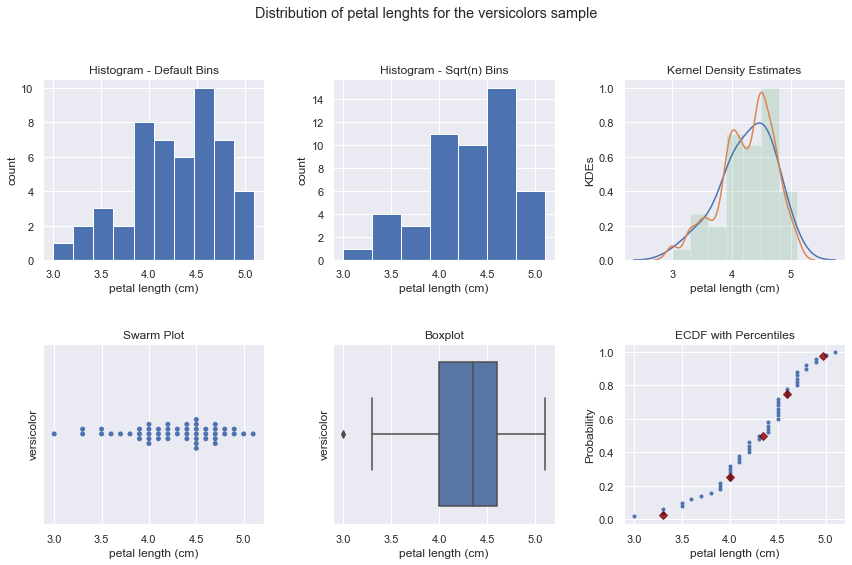

In [81]:
# fig
fig, [[ax00, ax01, ax02], [ax10, ax11, ax12]] = plt.subplots(nrows=2, ncols=3, figsize = (3 * 4, 2 * 4))

# paramters
len_vers = len(versicolor_petal_length)
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Plot histograms, swarmplot & boxplot
_ = ax00.hist(versicolor_petal_length)
_ = ax01.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)))
_ = sns.swarmplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax10)
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax11)

# kde with several smoothing bandwidths
_ = sns.kdeplot(versicolor_petal_length, ax=ax02)
_ = sns.kdeplot(versicolor_petal_length, bw=.1, ax=ax02)
_ = ax02.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)), alpha=0.2, normed=True)

# ecdf with percentiles
x_vers, y_vers = ecdf(versicolor_petal_length)
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
_ = ax12.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = ax12.plot(ptiles_vers, percentiles/100, marker='D', color='maroon', linestyle='none', alpha=0.8)

# Label axes
for ax in (ax00, ax01, ax02, ax12):
    _ = ax.set_xlabel("petal length (cm)")
    _ = ax.set_ylabel('count')

for ax in (ax10, ax11):
    _ = ax.set_yticks([])
    _ = ax.set_ylabel('versicolor', rotation=90)

_ = ax02.set_ylabel('KDEs')
_ = ax12.set_ylabel('Probability')

# titles
_ = ax00.set_title('Histogram - Default Bins')
_ = ax01.set_title('Histogram - Sqrt(n) Bins')
_ = ax02.set_title('Kernel Density Estimates')
_ = ax10.set_title('Swarm Plot')
_ = ax11.set_title('Boxplot')
_ = ax12.set_title('ECDF with Percentiles')

_ = fig.suptitle('Distribution of petal lenghts for the versicolors sample')

plt.tight_layout(rect=[0, 0, 1, 0.9], h_pad=3, w_pad=2.5)


### Comparing several distributions

Boxplots and ECDFs can also be used to compare two or more distributions. The ECDFs in the example below expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

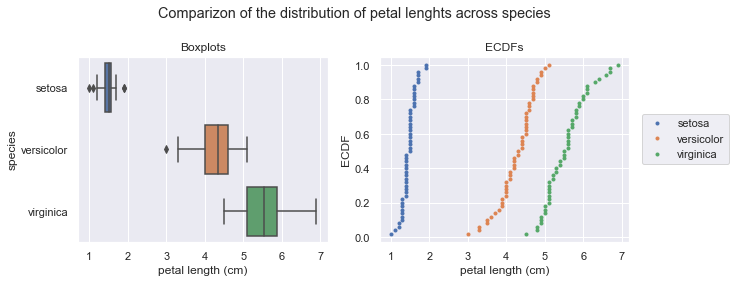

In [75]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 *5, 1 * 4))

# boxplots
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df, ax=ax1)

# compared ecdfs
x_seto, y_seto = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
_ = ax2.plot(x_seto, y_seto, marker='.', linestyle='none', label='setosa')
_ = ax2.plot(x_vers, y_vers, marker='.', linestyle='none', label='versicolor')
_ = ax2.plot(x_virg, y_virg, marker='.', linestyle='none', label='virginica')

# labels
_ = ax2.set_xlabel('petal length (cm)')
_ = ax2.set_ylabel('ECDF')

# titles
_ = ax1.set_title('Boxplots')
_ = ax2.set_title('ECDFs')

fig.suptitle('Comparizon of the distribution of petal lenghts across species')

# legend
handles, labels = ax2.get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.02, 0.5))


### Summary Statistics

Histograms, swarm plots and ECDFs are provide effective summaries of data. But sometimes, we need to summarize the data even more succinctly, say in one or two numbers. The most common one for continuous data are the mean or the median.

+ mean, based on the values of the data, is heavily influenced by outliers.
+ median, based on the ranking of the values, is immune to outliers.

The spread of data is measured by the standard deviation from the mean.


In [87]:
print('median: {:0.2} - mean: {:0.2} - std: {:0.2}'.format(np.median(versicolor_petal_length), np.mean(versicolor_petal_length), np.std(versicolor_petal_length)))

median: 4.3 - mean: 4.3 - std: 0.47


___

# Statistical Inference

Probabilistic reasoning allows us to describe uncertainty. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again and draw more general conclusions from relatively few data or observations.

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions. Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

Given a set of data, statistical inference describe probabilistically what you might expect if those data were acquired again. Repeating measurements provide an indication of the range of values we can expect the value of interest can take.


## Approximate Data with Common Distributions

If the observed data follows a common distribution, we can use its properties to infer conclusions about unseen data.


## Discrete Variables

### Bernoulli Trials & Binomial Distribution

** Definition **

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). 

A Bernoulli trial is a single success/failure experiment and has a Bernoulli distribution. It is a specific case ($n=1$) of the binomial distribution that considers the number of successses in $n$ independant experiments with a probability of success $p$.

**Parameters**

The binomial distribution has a mean of $n * p$ and a variance of $n * p * (1 - p)$. 

The probability of having exactly $x$ successes is slightly more complex: we are not interested in the order in which the successes occur, so we need to account for all the combinations of $x$ successes out of $n$ experiments. For a given combination (i.e. for a specific order in which the successes occur), the probability of having $x$ successes is:

$$Prob (x) = p^x * (1 - p)^{(n-x)}$$

This means that the binomial probability is:

$$b (x; n, p) = {}_{n}C_x * Prob (x) = \frac{n!}{x!(n-x)!} * p^x * (1 - p)^{(n-x)}$$

**Example**

A bank made 100 mortgage loans. What is the probabilit of losing money (more than 10% defaults), if the probability of a default is 5%?


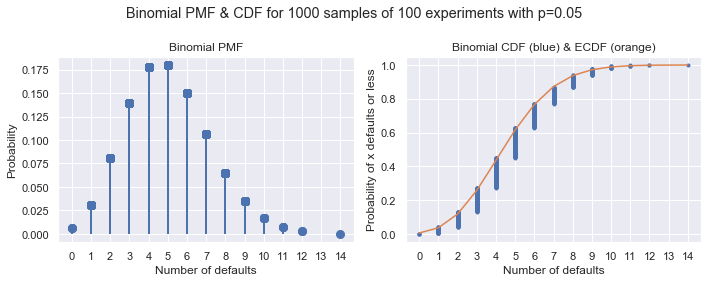

In [80]:
seed = np.random.seed(42)

# equivalent to np.random.binomial(100, 0.05, size=1000)
rv = stats.binom(100, 0.05)
n_defaults = rv.rvs(size=1000)

# ecdf
x, y = ecdf(n_defaults)

# Plot the PMF and ECDF
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = ax1.plot(x, rv.pmf(x), 'bo', ms=8, label='Binomial PMF')
_ = ax1.vlines(x, 0, rv.pmf(x), colors='b', lw=2)
_ = ax1.set_xticks(range(0, 15))

_ = ax2.plot(x, y, marker = '.', linestyle = 'none')
_ = ax2.plot(x, rv.cdf(x))

# labels
_ = ax1.set_xlabel('Number of defaults')
_ = ax1.set_ylabel('Probability')
_ = ax2.set_xlabel('Number of defaults')
_ = ax2.set_ylabel('Probability of x defaults or less')
_ = ax2.set_xticks(range(0, 15))

# titles
_ = ax1.set_title('Binomial PMF')
_ = ax2.set_title('Binomial CDF (blue) & ECDF (orange)')

fig.suptitle('Binomial PMF & CDF for 1000 samples of 100 experiments with p=0.05')

plt.tight_layout(rect=[0, 0, 1, 0.9])


In [95]:
# probability of having exactly 9 defaults (built-in vs manual formula)
print('Proba of having exactly nine defaults, given by the PMF:    {:.5}'.format(rv.pmf(9)))
print('Proba of having exactly nine defaults, calculated manually: {:.5}'.format(np.math.factorial(100) / (np.math.factorial(9) * np.math.factorial(100 - 9)) * np.power(0.05, 9) * np.power(1 - 0.05, 100-9)))

Proba of having exactly nine defaults, given by the PMF:    0.034901
Proba of having exactly nine defaults, calculated manually: 0.034901


In [271]:
# Probabilit of losing money (more than 10% defaults)
# p(default >= 10) = 1 - p(defaults <= 9)
print('Probability of losing money = {:.1%}'.format(1 - rv.cdf(9)))


Probability of losing money = 2.8%


### Poisson Distribution

**Definition**

A Poisson process describes situations where the timing of the next event is completely independent of when the previous event happened:
+ natural births in a given hospital.
+ hit on a website during a given hour.
+ molecular collisions in a gas.
+ aviation incidents.

The number of events of a Poisson process during a given amount of time follows a Poisson distribution of parameter $\lambda$: the events rate, or average number of events during that amount of time.

**Parameters**

The Poisson distribution has a mean and variance of $\lambda$.

**Example**

The homicide rate in Scotland fell last year to 99 from 115 the year before. Is this reported change really noteworthy?

The first thing to do is take the assumption that the homicide rate follows a Poisson distribution, i.e. that they occur at a constant mean rate and independently of the time since the last event. 

We can check the probability of observing a value at least as extreme as 99 for a Poisson distribution where $\lambda$ is the average of the known homicide rates, in this case 115. We can also check how many standard deviations is the new number from the mean.

Probability of seeing numbers as extreme: 0.0716
SD from the mean: -1.49


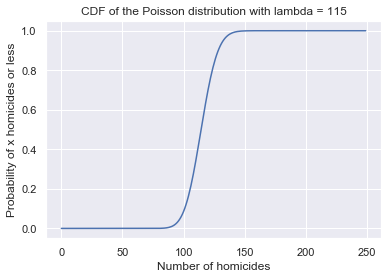

In [118]:
# CDF
_ = plt.plot(range(0, 250), stats.poisson.cdf(range(0, 250), 115))
plt.title('CDF of the Poisson distribution with lambda = 115')
plt.xlabel('Number of homicides')
plt.ylabel('Probability of x homicides or less')

# probability of having a number at least at extreme as 99
print('Probability of seeing numbers as extreme: {:.3}'.format(stats.poisson.cdf(99, 115)))

# standard deviations from the mean
print('SD from the mean: {:.3}'.format((99 - 115) / np.sqrt(115)))


### Approximating Distributions

**Poisson vs Binomial distribution**

The Poisson distribution is a limit of the Binomial distribution with low probability of success and large number of trials, i.e. for rare events. the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). 

Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.


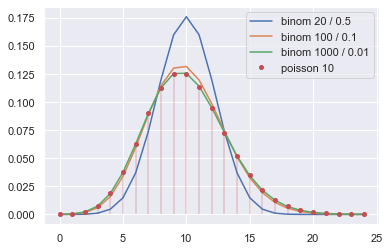

In [133]:
# Poisson vs Binomial distributions
# same mean if np = lambda
# same standard deviation when n >> p
x = range(0, 25)

_ = plt.plot(x, stats.binom.pmf(x, 20, 0.5), label='binom 20 / 0.5')
_ = plt.plot(x, stats.binom.pmf(x, 100, 0.1), label='binom 100 / 0.1')
_ = plt.plot(x, stats.binom.pmf(x, 1000, 0.01), label='binom 1000 / 0.01')
_ = plt.plot(x, stats.poisson.pmf(x, 10), 'ro', ms=4, label='poisson 10')
_ = plt.vlines(x, 0, stats.poisson.pmf(x, 10), colors='r', lw=2, alpha=0.2)

_ = plt.legend(loc='top right')


In [130]:
# Proba of having at most one success: Poisson vs Binomial
print('Poisson vs Binomial')
print('Poisson (l=10):        {:0.3}'.format(stats.poisson.cdf(5, 10)))
print('Binom (n=20, p=0.5):   {:0.3}'.format(stats.binom.cdf(5, 20, 0.5)))
print('Binom (n=200, p=0.05):  {:0.3}'.format(stats.binom.cdf(5, 200, 0.05)))
print('Binom (n=2000, p=0.005): {:0.3}'.format(stats.binom.cdf(5, 2000, 0.005)))


Poisson vs Binomial
Poisson (l=10):        0.0671
Binom (n=20, p=0.5):   0.0207
Binom (n=200, p=0.05):  0.0623
Binom (n=2000, p=0.005): 0.0666


**Binomial vs Normal distribution**

The Binomial distribution is not symmetric, but can be approximated by a Normal distribution of same mean and variance if $n$ is not too small and $p$ not too close to either 0 or 1 (the approximation is fairly accurate when both $n *p$ and $n * (1-p)$ are both ≥ 5).


In [131]:
def binom_vs_normal(n, p, ax):
    """
    plot the pmf of a binomial distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = n * p
    sd = np.sqrt(n*p*(1-p))
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.binom.pmf(x_disc, n, p), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.binom.pmf(x_disc, n, p), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('n = {}, p = {}, approx: {}'.format(n, p, 'good' if n*p >= 5 and n*(1-p) >= 5 else 'weak'))


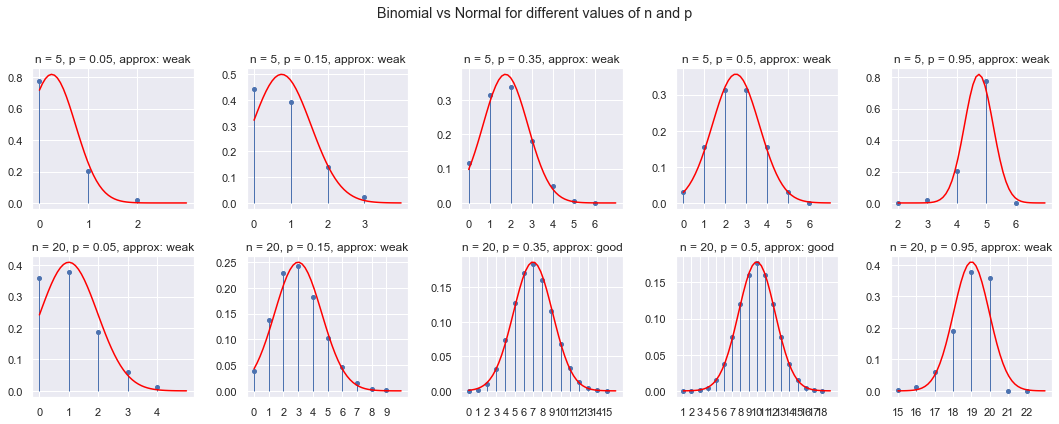

In [132]:

# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (5 * 3, 2 * 3))

binom_vs_normal(5, 0.05, ax[0, 0])
binom_vs_normal(5, 0.15, ax[0, 1])
binom_vs_normal(5, 0.35, ax[0, 2])
binom_vs_normal(5, 0.50, ax[0, 3])
binom_vs_normal(5, 0.95, ax[0, 4])

binom_vs_normal(20, 0.05, ax[1, 0])
binom_vs_normal(20, 0.15, ax[1, 1])
binom_vs_normal(20, 0.35, ax[1, 2])
binom_vs_normal(20, 0.50, ax[1, 3])
binom_vs_normal(20, 0.95, ax[1, 4])

fig.suptitle('Binomial vs Normal for different values of n and p')
fig.tight_layout(rect=[0, 0, 1, 0.9])


**Poisson vs Normal distribution**

The Poisson distribution can an be approximated by a Normal distribution of same mean and variance if $\lambda$ is large (the approximation is fairly accurate when $\lambda$ is greater than 10, except deep in the tails).


In [83]:
def poisson_vs_normal(l, ax):
    """
    plot the pmf of a poisson distrib for n experiments with proba of success p
    vs the pdf of the normal distrib of same mean and variance.
    """

    mu = l
    sd = np.sqrt(l)
    xmin = max(0, np.floor(mu - 4 * sd).astype(int))
    xmax = np.ceil(mu + 4 * sd).astype(int)
    x_disc = range(xmin, xmax)
    x_cont = np.linspace(xmin, xmax, 50)
    
    _ = ax.plot(x_disc, stats.poisson.pmf(x_disc, l), 'bo', ms=4)
    _ = ax.vlines(x_disc, 0, stats.poisson.pmf(x_disc, l), colors='b', lw=1)
    _ = ax.plot(x_cont, stats.norm.pdf(x_cont, mu, sd), color='red')
    _ = ax.set_xticks(x_disc)

    _ = ax.set_title('lambda = {}'.format(l))


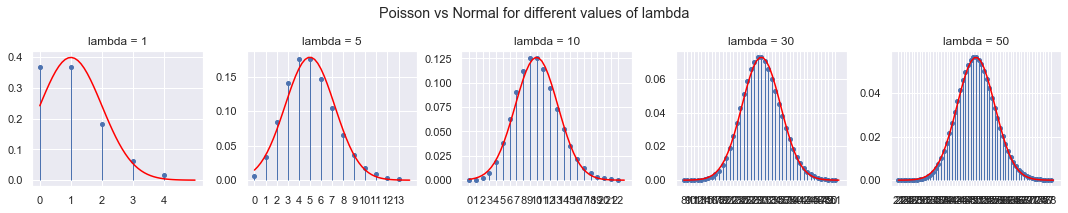

In [85]:

# Plot the PMF and PDF
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (5 * 3, 1 * 3))

poisson_vs_normal(1, ax[0])
poisson_vs_normal(5, ax[1])
poisson_vs_normal(10, ax[2])
poisson_vs_normal(30, ax[3])
poisson_vs_normal(50, ax[4])

fig.suptitle('Poisson vs Normal for different values of lambda')
fig.tight_layout(rect=[0, 0, 1, 0.9])


**Continuity Correction**

Approximating a discrete distribution by a continuous distribution requires an adjustment called a continuity correction. When you use a Normal distribution to approximate a Binomial or Poisson distribution, it’s as simple as adding or subtracting 0.5 to the discrete x-value:

| Discrete | Continuous               |
|----------|--------------------------|
| P(X = n) | P(n – 0.5 < X < n + 0.5) |
| P(X > n) | P(X > n + 0.5)           |
| P(X ≥ n) | P(X > n – 0.5)           |
| P(X < n) | P(X < n – 0.5)           |
| P(X ≤ n) | P(X < n + 0.5)           |


In [113]:


# Proba of having at most one success: Poisson vs Normal
print('Poisson vs Normal')
print('l=5,  x=5:  {:0.3} vs {:0.3}'.format(stats.poisson.cdf(5, 5), stats.norm.cdf(5.5, 5, np.sqrt(5))))
print('l=25, x=25: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(25, 25), stats.norm.cdf(25.5, 25, np.sqrt(25))))
print('l=50, x=50: {:0.3} vs {:0.3}'.format(stats.poisson.cdf(50, 50), stats.norm.cdf(50.5, 50, np.sqrt(50))))


Poisson vs Binomial
Poisson (l=5):          0.0404
Binom (n=50, p=0.1):    0.0338
Binom (n=500, p=0.01):  0.0398
Binom (n=500, p=0.001): 0.0404


Poisson vs Normal
l=5,  x=5:  0.616 vs 0.588
l=25, x=25: 0.553 vs 0.54
l=50, x=50: 0.538 vs 0.528


## Continuous Variables

### Normal Distribution

The Normal Distribution describes a continuous variable whose PDF is symetrical and has a single peak. It has two parameters:
+ The mean describes where the center of the peak is. 
+ The standard deviation describes how wide the peak is, or how spread out the data are.

The smaller the standard deviation, the more vertical the CDF slope around the median (which is equal to the mean).

_Note: most statistical methods assume the data is roughly normal. This assumption must always be checked first: many things that you might assume are normally distributed are actually not. In particular, outliers are extremely unlikely for normally distributed data; if your data does have extreme values, the normal distribution might not be the best description. _

_Note: We can compare the ECDF to the theoritical CDF of the normal distribution with same mean and standard deviation to assess if the data is normally distributed._


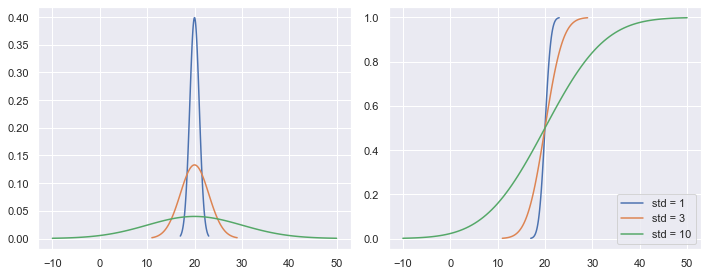

In [122]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for sigma in [1, 3, 10]:

    x = np.linspace(20 - 3*sigma, 20 + 3*sigma, 100)
    _ = ax1.plot(x, stats.norm.pdf(x, 20, sigma))
    _ = ax2.plot(x, stats.norm.cdf(x, 20, sigma))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

plt.tight_layout()

### Exponential Distribution

The number of random events per unit of time can be described by a Poisson distribution. The amount of time between random events of a Poisson process follow an Exponential distribution. It has a single parameter: the mean waiting time.


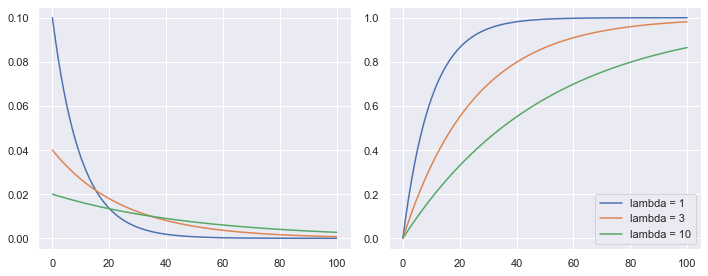

In [182]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for rate in [10, 25, 50]:

    x = np.linspace(0, 100, 100)
    _ = ax1.plot(x, stats.expon.pdf(x, scale = rate))
    _ = ax2.plot(x, stats.expon.cdf(x, scale = rate))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='lower right')

plt.tight_layout()

### Use Cases

#### Normal Distribution - Belmont Stakes

The data has been scraped from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).
+ Secretariat ran the fastest Belmont Stakes in history in 1973. 
+ While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 

We remove these two outliers from the data set to compute the mean and standard deviation of the Belmont winners' times. The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.


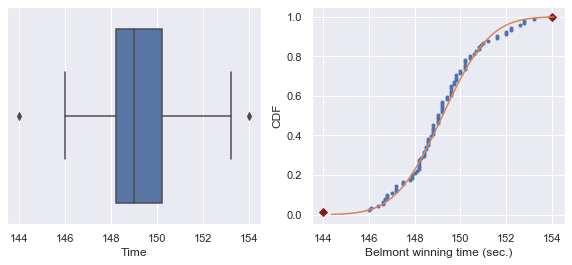

In [190]:
# load df
belmont_df = pd.read_csv('./belmont_stakes.csv')
belmont_no_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 0, 'Time']
belmont_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 1, 'Time'].sort_values()

# ecdf
x, y = ecdf(belmont_df['Time'])

# Compute mean and standard deviation without the outliers: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()
x_theor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y_theor = stats.norm.cdf(x_theor, mu, sigma)

# Plot the CDFs and show the plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = sns.boxplot(x=belmont_df['Time'], ax=ax1)
_ = ax2.plot(x, y, marker='.', linestyle='none')
_ = ax2.plot(belmont_outliers, y[[0, -1]], marker='D', color='maroon', linestyle='none', alpha=0.8)
_ = ax2.plot(x_theor, y_theor)
_ = ax2.set_xlabel('Belmont winning time (sec.)')
_ = ax2.set_ylabel('CDF')


If we assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat is very small: 0.06%.

_Note: the probability is so low that we need to take a million samples to be sure we get this value from the normal distribution at least once, when using hackers statistics._

In [164]:
secretariat = belmont_df.loc[belmont_df['Winner'] == 'Secretariat', 'Time'].values[0]
prob = stats.norm(mu, sigma).cdf(144)

# alternative: hacker statistics
# sample = np.random.normal(loc=mu, scale=sigma, size=1000000)
# prob = np.sum(sample <= secretariat) / 1000000

print('Probability of besting Secretariat: {:.2%}'.format(prob))


Probability of besting Secretariat: 0.063%


___

# Parameter Estimation

## Bootstrap Samples

If we believe the process that generates our data follows a given probability distribution, the optimal parameters for the model are directly computed from the data itself.

Slight variations in the measured data would lead to slightly different parameters. We can simulate getting new data (i.e. what we would get from an infinitude of experiments) by bootstrapping: resampling our data with replacement and recomputing the parameter(s) of interest. We can plot the ECDF of the generated summary statistics to get the probability distribution of the parameter.

+ each new sample is called a bootstrap sample.
+ its summary statistics is called a bootstrap replicate.

We can also calculate confidence intervals of the statistics. If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.


In [17]:
def bootstrap_sample_1d(data):
    """Generate bootstrap sample of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return bs_sample

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = bootstrap_sample_1d(data)
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


## Population Mean

The probability distribution of the sample mean will always be normally distributed if some conditions are met. In this case:
+ mu 
+ standard error of the mean = $\sigma / \sqrt{n}$


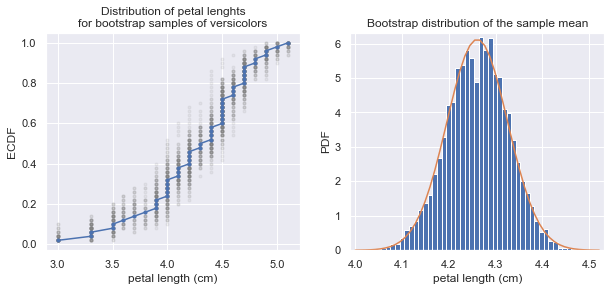

In [68]:
# fig & seed
seed = np.random.seed(42)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

# plot the ECDF of 50 bootstrap samples
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = bootstrap_sample_1d(versicolor_petal_length)

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = ax1.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(versicolor_petal_length)
_ = ax1.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = ax1.set_xlabel('petal length (cm)')
_ = ax1.set_ylabel('ECDF')
_ = ax1.set_title('Distribution of petal lenghts\nfor bootstrap samples of versicolors')



# Take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(versicolor_petal_length, np.mean, size=10000)

# Make a histogram of the results
_ = ax2.hist(bs_replicates, bins=50, normed=True)
_ = ax2.set_xlabel('petal length (cm)')
_ = ax2.set_ylabel('PDF')
_ = ax2.set_title('Bootstrap distribution of the sample mean')

# the distribution of the sample mean is normally distributed around the mean
bs_mu = np.mean(bs_replicates) # mean of the mean
bs_std = np.std(bs_replicates) # standard error of the mean

xmin = bs_mu - 4 * bs_std
xmax = bs_mu + 4 * bs_std
x = np.linspace(xmin, xmax, 50)

_ = ax2.plot(x, stats.norm.pdf(x, bs_mu, bs_std))


In [37]:
# compare the theoritical SEM vs from bootstrap replicates
sem = np.std(versicolor_petal_length) / np.sqrt(len(versicolor_petal_length))
bs_std = np.std(bs_replicates)
print('SEM: {:.3} - Bootstraps SD: {:.3}'.format(sem, bs_std))


SEM: 0.0658 - Bootstraps SD: 0.0652


In [40]:
# confidence intervals
ci = np.percentile(bs_replicates, [2.5, 97.5])
ci


array([4.13 , 4.386])

## Population Variance

The distribution of the sampling variance is not normal and is always skewed to the right. Its mean is equal to the population variance. In addition, and only if the population from which samples are selected has a normal distribution, the sampling distribution of sample variances follows a chi-square distribution with the sample size minus one (n-1) degrees of freedom.


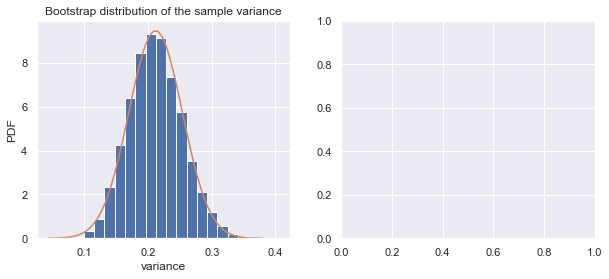

In [67]:
# fig & seed
seed = np.random.seed(42)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

# Take 10,000 bootstrap replicates of the variance
bs_replicates = draw_bs_reps(versicolor_petal_length, np.var, size=10000)

# Make a histogram of the results
_ = ax1.hist(bs_replicates, bins=20, normed=True)
_ = ax1.set_xlabel('variance')
_ = ax1.set_ylabel('PDF')
_ = ax1.set_title('Bootstrap distribution of the sample variance')

# the distribution of the sample mean is NOT normally distributed around the mean
bs_mu = np.mean(bs_replicates) # mean of the variance
bs_std = np.std(bs_replicates) # standard error of the variance

xmin = bs_mu - 4 * bs_std
xmax = bs_mu + 4 * bs_std
x = np.linspace(xmin, xmax, 50)

_ = ax1.plot(x, stats.norm.pdf(x, bs_mu, bs_std))


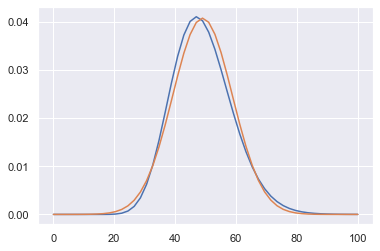

In [66]:
x = np.linspace(0, 100, 50)
plt.plot(x, stats.chi2.pdf(x, 49))
plt.plot(x, stats.norm.pdf(x, 49, 9.8))